<a href="https://colab.research.google.com/github/aposey394/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Amanda_Posey_114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [1]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [2]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [3]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=155.2589543061224, mobile=False), User(purchased=True, time_on_site=240.4043563876704, mobile=True), User(purchased=False, time_on_site=121.22338261253263, mobile=True), User(purchased=False, time_on_site=60.473785880989645, mobile=True), User(purchased=True, time_on_site=194.65462520342584, mobile=True), User(purchased=True, time_on_site=125.32893959037314, mobile=True), User(purchased=False, time_on_site=94.66493374117461, mobile=True), User(purchased=True, time_on_site=225.78099483771314, mobile=True), User(purchased=False, time_on_site=228.4498650652089, mobile=True), User(purchased=False, time_on_site=20.070848241888278, mobile=False)]


In [4]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,155.258954,False
1,True,240.404356,True
2,False,121.223383,True
3,False,60.473786,True
4,True,194.654625,True


In [5]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.292151247743053,5.29723609522623,5.3092432258665685,5.920164270252698,6.154348885608981,6.611155210501104,6.698481803016234,6.845273058026702,7.275058473127268,7.435082347091141,...,572.0402892977182,575.4632102208158,577.5395524295334,582.1156730279589,582.6566544900679,584.4310966958734,586.5221761870976,588.2637365347794,592.9300608634559,595.8209801179348
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,0,0,1,1,1,1,1,1,1,...,0,1,1,0,1,0,1,1,0,0
True,0,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,1


In [7]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins.astype(str))

time_on_site,"(123.398, 241.504]","(241.504, 359.609]","(359.609, 477.715]","(4.702, 123.398]","(477.715, 595.821]"
purchased,,,,,
False,218,115,24,235,15
True,151,86,26,108,22


In [8]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins.astype(str), normalize='columns')

time_on_site,"(123.398, 241.504]","(241.504, 359.609]","(359.609, 477.715]","(4.702, 123.398]","(477.715, 595.821]"
purchased,,,,,
False,0.590786,0.572139,0.48,0.685131,0.405405
True,0.409214,0.427861,0.52,0.314869,0.594595


In [9]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.688,0.58
True,0.312,0.42


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [17]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

url='https://raw.githubusercontent.com/aposey394/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

df = pd.read_csv(url, index_col=0)
print(df.head(5))




   age  weight  exercise_time
0   44     118            192
1   41     161             35
2   46     128            220
3   39     216             57
4   28     116            182


In [86]:
df.nlargest(3, 'age')
df.nsmallest(3, 'age')

,age,weight,exercise_time
18,18,122,271.0
83,18,114,104.0
171,18,138,235.0


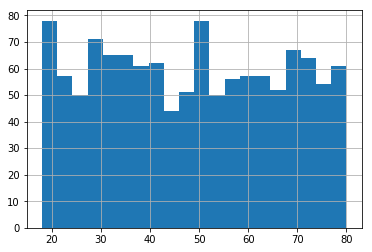

In [18]:
df['age'].hist(bins=20)

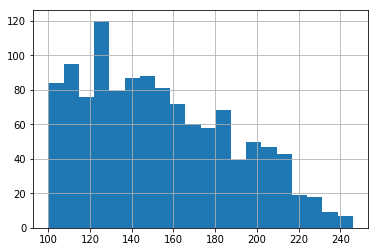

In [19]:
df['weight'].hist(bins=20)

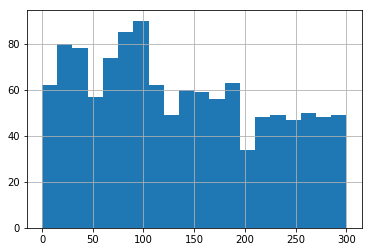

In [21]:
df['exercise_time'].hist(bins=20)

In [0]:
import numpy as np

df[df < 0] = 0

In [78]:
df.isnull().sum()

age              0
weight           0
exercise_time    0
dtype: int64

In [0]:
#The bins were too convoluted for me. I needed them in proper intervals.
#Some Google-Fu found the IntervalIndex tool.

#Bins1 will organize the weights.
bins1 = pd.IntervalIndex.from_tuples([(100, 125), (126, 150), (151, 175), (176, 200), (201, 225), (226, 250)])

#Bins2 will organize exercise times
bins2 = pd.IntervalIndex.from_tuples([(0, 20), (21, 40), (41, 60), (61, 80), (81, 100), (101, 120), (121, 140), (141, 160), (161, 180), (181, 200), (201, 300)])

#Bins3 will organize ages.
bins3 = pd.IntervalIndex.from_tuples([(18, 20), (21, 25), (26, 30), (31, 35), (36, 40), (41, 45), (46, 50), (51, 55), (56, 60), (61, 65), (66, 70), (71, 75), (76, 80)])

#And then I ended up not using this. 
#I overcomplicated it SO MUCH.
#But also, look! I learned a new thing!


In [0]:
weight_bins = pd.cut(df['weight'], bins=5, labels=["100-129", "129-158", "158-188", "188-217", "217-246"], precision=0)


In [108]:
pd.crosstab(weight_bins, df['exercise_time'], normalize='columns')

exercise_time,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,290.0,291.0,292.0,293.0,294.0,296.0,297.0,298.0,299.0,300.0
weight,,,,,,,,,,,,,,,,,,,,,
100-129,0.0,0.00,0.142857,0.333333,0.2,0.000000,0.000000,0.0,0.333333,0.000000,...,0.0,0.666667,0.0,0.666667,1.0,1.0,0.5,0.5,1.0,0.4
129-158,0.0,0.25,0.000000,0.000000,0.0,0.142857,0.333333,1.0,0.000000,0.333333,...,1.0,0.333333,1.0,0.333333,0.0,0.0,0.5,0.5,0.0,0.6
158-188,0.5,0.00,0.285714,0.166667,0.4,0.285714,0.000000,0.0,0.333333,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
188-217,0.5,0.50,0.285714,0.000000,0.4,0.142857,0.333333,0.0,0.000000,0.666667,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
217-246,0.0,0.25,0.285714,0.500000,0.0,0.428571,0.333333,0.0,0.333333,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
exercise_time_bins = pd.cut(df['exercise_time'], bins=5, labels=["0-60", "60-120", "120-180", "180-240", "240-300"], precision=0)
pd.crosstab(weight_bins, exercise_time_bins.astype(str))

exercise_time,0-60,120-180,180-240,240-300,60-120
weight,,,,,
100-129,53,71,79,107,65
129-158,44,67,74,74,76
158-188,61,56,38,10,93
188-217,76,29,1,0,73
217-246,44,0,0,0,9


In [110]:
age_bins = pd.cut(df['age'], bins=5, labels=["18-30", "30-43", "43-55", "55-68", "68-80"], precision=0)
pd.crosstab(age_bins, exercise_time_bins.astype(str))

exercise_time,0-60,120-180,180-240,240-300,60-120
age,,,,,
18-30,52,54,61,43,46
30-43,52,42,47,57,55
43-55,41,39,34,67,42
55-68,46,40,41,24,71
68-80,87,48,9,0,102


In [113]:
age_time_table = pd.crosstab(index=age_bins, columns=exercise_time_bins, rownames=['Age'], colnames=['Time'])

age_time_table


Time,0-60,60-120,120-180,180-240,240-300
Age,,,,,
18-30,52,46,54,61,43
30-43,52,55,42,47,57
43-55,41,42,39,34,67
55-68,46,71,40,41,24
68-80,87,102,48,9,0


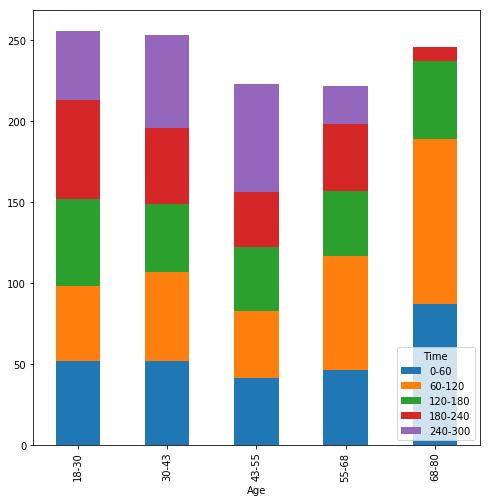

In [123]:
age_time_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)



In [119]:
weight_time_table = pd.crosstab(index=weight_bins, columns=exercise_time_bins, rownames=['Weight'], colnames=['Time'])

weight_time_table


Time,0-60,60-120,120-180,180-240,240-300
Weight,,,,,
100-129,53,65,71,79,107
129-158,44,76,67,74,74
158-188,61,93,56,38,10
188-217,76,73,29,1,0
217-246,44,9,0,0,0


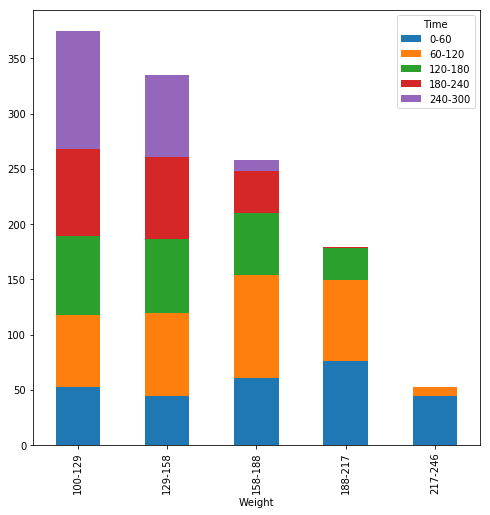

In [120]:
weight_time_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data? **For our purposes, the data is discrete. Time, while continuous, is used with clear beginning and end points in this data set. **

2.  What are the relationships between the variables? **It appears that younger people who weigh less spend the most time at the gym.**

3.  Which relationships are "real", and which spurious? **It seems all relationships in this data are real.**


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)